In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [5]:
data=pd.read_csv(r'C:\Users\HP\Downloads\Zomato data .csv')

In [6]:
data

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


In [95]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


In [96]:
data.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

In [97]:
data.shape

(148, 7)

In [98]:
type(data)

pandas.core.frame.DataFrame

# Convert the data type of column-rate

In [99]:
data['rate_up']=data['rate'].str.split('/').str[0]

In [100]:
data.drop('rate',axis=1,inplace=True)

In [118]:
data.head()

,name,online_order,book_table,votes,approx_cost(for two people),listed_in(type),rate_up
0,Jalsa,1,Yes,775,800,Buffet,15
1,Spice Elephant,1,No,787,800,Buffet,15
2,San Churro Cafe,1,No,918,800,Buffet,11
3,Addhuri Udupi Bhojana,0,No,88,300,Buffet,10
4,Grand Village,0,No,166,600,Buffet,11


# 1.What type of restaurant do the majority of coustomers order form?

Text(0.5, 0, 'Type of restaurant')

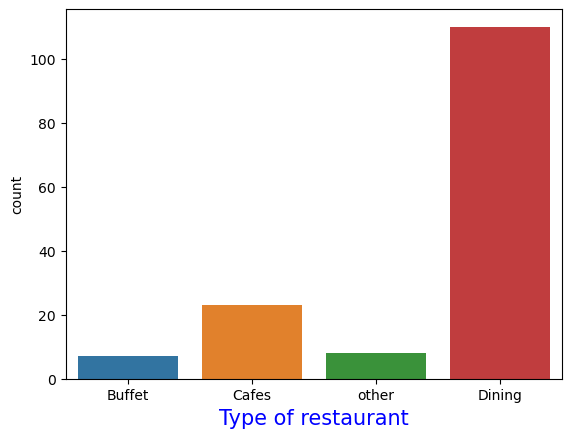

In [8]:
sns.countplot(x=data['listed_in(type)'])
plt.xlabel('Type of restaurant',c='blue',size=15)

# conclusion- Majority of the restaurant falls in dinning category

# 2.How many votes has each type of restaurant received from customers?

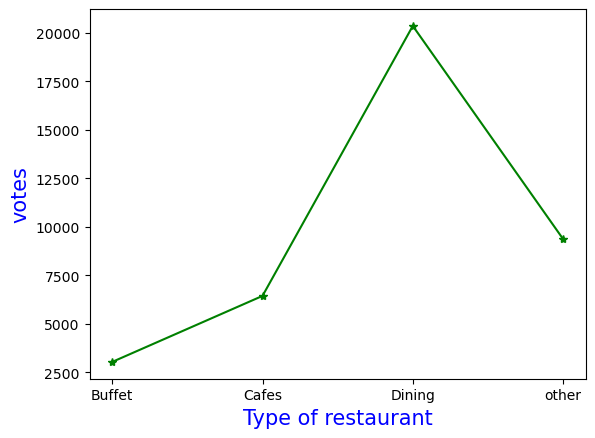

In [9]:
grouped_data=data.groupby('listed_in(type)')['votes'].sum()
result=pd.DataFrame({'votes': grouped_data})
plt.plot(result,c='green',marker='*')
plt.xlabel('Type of restaurant',c='blue',size=15)
plt.ylabel('votes',c='blue',size=15);

# conclusion- dining restaurant has received maximum votes

# 3.What are the rating that the mejority of restaurant have received?

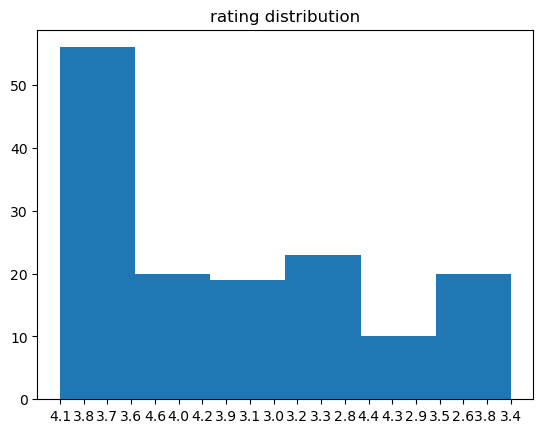

In [107]:
plt.hist(data['rate_up'],bins=6)
plt.title('rating distribution')
plt.show();

# conclusion- The majority restaurants received rating from 3.5 to 4

# 4.Zomato has observed that most couples order most of their food online.What is their average spanding on each order?

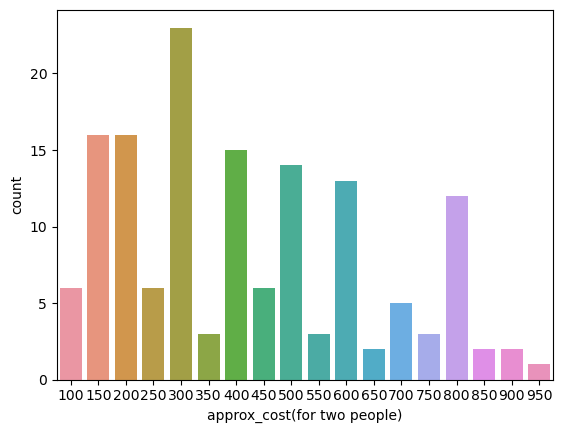

In [108]:
couple_data=data['approx_cost(for two people)']
sns.countplot(x=couple_data);

# conclusion- the majority of couples preferred restaurants with an approximate cost of 300 rupees.

# 5.Which mode(online or offline) has received the maximum rating? 

In [110]:
from sklearn.preprocessing import LabelEncoder

In [111]:
enc=LabelEncoder()

In [113]:
data[['online_order']]=data[['online_order']].apply(enc.fit_transform)

In [114]:
data[['rate_up']]=data[['rate_up']].apply(enc.fit_transform)

In [115]:
data.head()

,name,online_order,book_table,votes,approx_cost(for two people),listed_in(type),rate_up
0,Jalsa,1,Yes,775,800,Buffet,15
1,Spice Elephant,1,No,787,800,Buffet,15
2,San Churro Cafe,1,No,918,800,Buffet,11
3,Addhuri Udupi Bhojana,0,No,88,300,Buffet,10
4,Grand Village,0,No,166,600,Buffet,11


<Figure size 600x600 with 0 Axes>

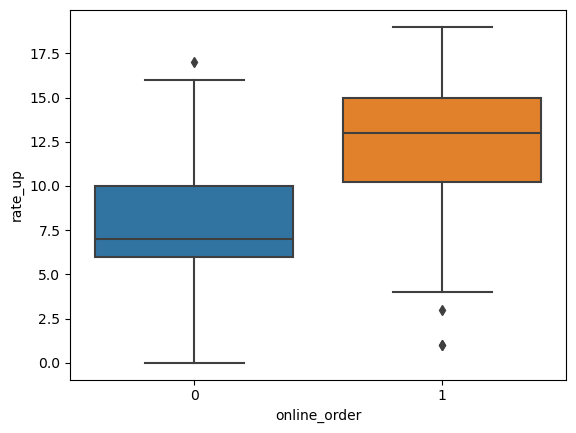

<Figure size 600x600 with 0 Axes>

In [116]:
sns.boxplot(x='online_order',y='rate_up',data=data);
plt.figure(figsize=(6,6))

# conclusion- Offline order received lower rating in comparison to online order.

# 6.Which type of restaurant received more offline orders so that the Zomato can provied those customers with some good offers?

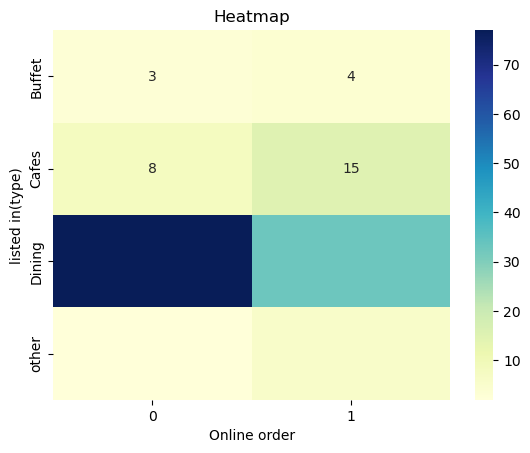

In [117]:
pivot_table=data.pivot_table(index='listed_in(type)',columns='online_order',aggfunc='size',fill_value=0)
sns.heatmap(pivot_table,annot=True,cmap='YlGnBu',fmt='d')
plt.title('Heatmap')
plt.xlabel('Online order')
plt.ylabel('listed in(type)')
plt.show()

# conclusion- Dining restaurants primarily accept offline orders, where cafe primarily receive online order. This suggests that clients prefer order in person at restaurants, but prefer online ordering at cafes.